In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sqlalchemy import create_engine


In [2]:
# Load training dataset (uploaded 'train.csv')
df = pd.read_csv('Resources/train.csv')  # Adjust path if needed
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Normalize numerical columns
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

C:\Users\the_a\AppData\Local\Temp\ipykernel_2668\3032370508.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\the_a\AppData\Local\Temp\ipykernel_2668\3032370508.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [4]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model_results = []

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_preds = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)
model_results.append({
    'Model': 'Logistic Regression',
    'Params': 'max_iter=1000',
    'Accuracy': round(log_acc * 100, 2)
})

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
model_results.append({
    'Model': 'Random Forest',
    'Params': 'n_estimators=100, max_depth=5',
    'Accuracy': round(rf_acc * 100, 2)
})

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
model_results.append({
    'Model': 'K-Nearest Neighbors',
    'Params': 'n_neighbors=3',
    'Accuracy': round(knn_acc * 100, 2)
})


In [6]:
results_df = pd.DataFrame(model_results)
results_df.to_csv('model_results.csv', index=False)

print("✅ Model comparisons saved to model_results.csv")
results_df


✅ Model comparisons saved to model_results.csv


,Model,Params,Accuracy
0,Logistic Regression,max_iter=1000,81.01
1,Random Forest,"n_estimators=100, max_depth=5",81.56
2,K-Nearest Neighbors,n_neighbors=3,81.01


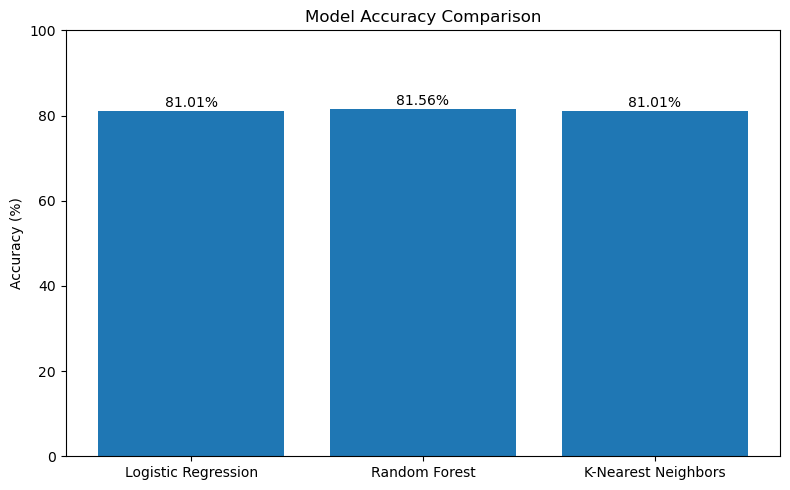

In [7]:
# Create DataFrame from model results (if needed)
results_df = pd.DataFrame(model_results)

# Bar plot of model accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['Accuracy'])

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Add value labels on top
for index, value in enumerate(results_df['Accuracy']):
    plt.text(index, value + 1, f'{value}%', ha='center')

plt.tight_layout()
plt.show()

In [8]:
# ⚠️ Update these credentials before running
db_user = 'your_username'
db_password = 'your_password'
db_host = 'localhost'
db_port = '5432'
db_name = 'your_database_name'


connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_user, db_password, db_host, db_port, db_name
)
engine = create_engine(connection_string)

df.to_sql('titanic_data', engine, if_exists='replace', index=False)
print("✅ Cleaned data saved to PostgreSQL.")
engine.dispose()  # Close the connection
print("✅ Connection closed.")

ModuleNotFoundError: No module named 'psycopg2'